In [8]:
!pip install tensorflow
!pip install tensorflow==2.4.0
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==2.4.0


In [258]:
import urllib.request

url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip"
filename = "data.zip" 

urllib.request.urlretrieve(url, filename)

('data.zip', <http.client.HTTPMessage at 0x283871dd2b0>)

In [3]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('dataCaption') 


In [9]:
x = []
y = []
datadir = 'dataaa/dataset'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

3500
3500
labels : ['non-fraction', 'fraction']


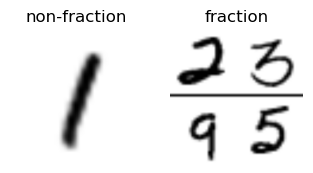

In [10]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

In [11]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (56, 56))
    X.append(threshold_image)
print(len(X))


3500


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

3500


In [13]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming you have input data X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Convert labels to categorical if needed
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(2240, 56, 56, 1)
(560, 56, 56, 1)
(700, 56, 56, 1)
(2240, 2)
(560, 2)
(700, 2)


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, Activation, MaxPool2D, Flatten, Dropout, Dense, Input
)
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

def math_symbol_and_digits_recognition(input_shape=(56, 56, 1)):
    regularizer = regularizers.l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation('relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation('relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation('relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(2, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [16]:
#Improved model
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, Activation, MaxPool2D, Flatten, Dropout, Dense, Input
)
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

def math_symbol_and_digits_recognition(input_shape=(56, 56, 1)):
    regularizer = regularizers.l2(0.01)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv1', activity_regularizer=regularizer))
    model.add(Activation('relu', name='act1'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv2', activity_regularizer=regularizer))
    model.add(Activation('relu', name='act2'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', 
                     kernel_initializer=glorot_uniform(seed=0), 
                     name='conv3', activity_regularizer=regularizer))
    model.add(Activation('relu', name='act3'))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(120, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dense(84, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dense(2, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate if needed
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [17]:
model = math_symbol_and_digits_recognition(input_shape=(56, 56, 1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 56, 56, 32)        320       
                                                                 
 act1 (Activation)           (None, 56, 56, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 28, 28, 32)        9248      
                                                                 
 act2 (Activation)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [18]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

In [19]:
print(X_train.shape)
print(X_test.shape)

(2240, 56, 56, 1)
(700, 56, 56, 1)


In [20]:
aug = ImageDataGenerator(zoom_range=0.1,
#                          rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)
hist = model.fit(aug.flow(X_train, y_train, batch_size=32), batch_size=32, epochs=30, validation_data=(X_test, y_test))
#hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/30
70/70 [==============================] - 4s 55ms/step - loss: 3.1358 - accuracy: 0.9786 - val_loss: 1.5298 - val_accuracy: 1.0000
Epoch 2/30
70/70 [==============================] - 4s 57ms/step - loss: 0.6271 - accuracy: 1.0000 - val_loss: 0.8564 - val_accuracy: 1.0000
Epoch 3/30
70/70 [==============================] - 4s 53ms/step - loss: 0.3380 - accuracy: 1.0000 - val_loss: 0.5774 - val_accuracy: 1.0000
Epoch 4/30
70/70 [==============================] - 4s 54ms/step - loss: 0.2184 - accuracy: 1.0000 - val_loss: 0.4212 - val_accuracy: 1.0000
Epoch 5/30
70/70 [==============================] - 3s 44ms/step - loss: 0.1583 - accuracy: 1.0000 - val_loss: 0.3681 - val_accuracy: 1.0000
Epoch 6/30
70/70 [==============================] - 3s 42ms/step - loss: 0.1669 - accuracy: 0.9991 - val_loss: 0.2683 - val_accuracy: 1.0000
Epoch 7/30
70/70 [==============================] - 4s 53ms/step - loss: 0.0900 - accuracy: 1.0000 - val_loss: 0.2146 - val_accuracy: 1.0000
Epoch 8/30
70

In [21]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(y_test, axis=1)
print(classification_report(Y_test_hat, ypred))


22/22 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       335

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [22]:
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['non-fraction', 'fraction']
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20<=w and 30<=h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=56)
            if th > tw:
                thresh = imutils.resize(thresh, height=56)
            (th, tw) = thresh.shape
            dx = int(max(0, 56 - tw)/2.0)
            dy = int(max(0, 56 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                       value=(0, 0, 0))
            padded = cv2.resize(padded, (56, 56))
            padded = np.array(padded)
            padded = padded/255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 30ms/step


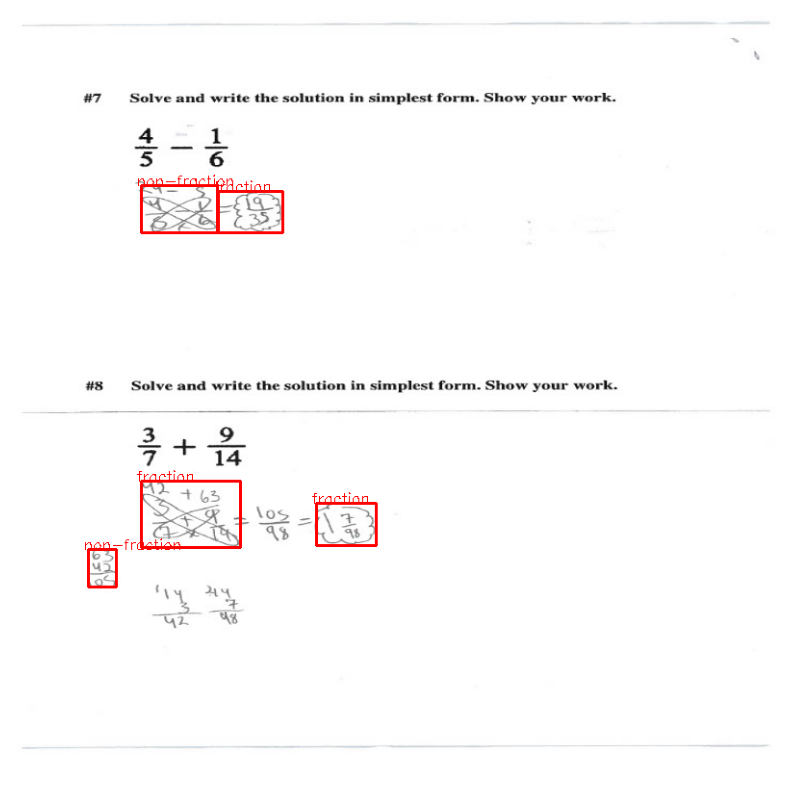

In [23]:
test_pipeline('6.jpg')

1/1 [==============================] - 0s 22ms/step


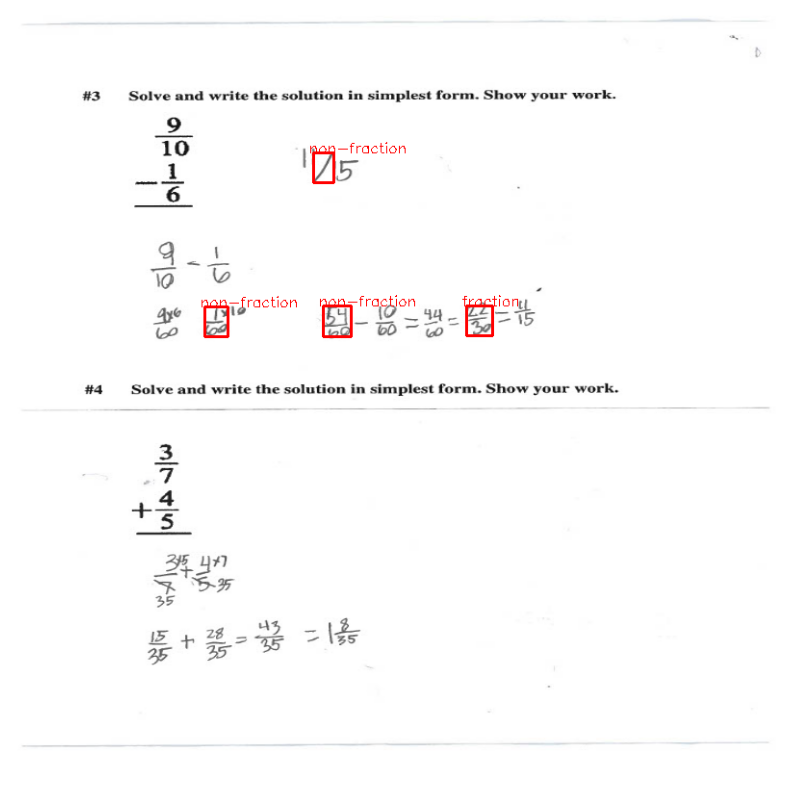

In [26]:
test_pipeline('2.jpg')

In [39]:
#add bounding Box
import cv2
import os

def add_bounding_box(image):
    # Apply segmentation to isolate the fraction

    # Find contours or template match the numerator, denominator, and fraction bar

    # Calculate the bounding box coordinates for the fraction components
    x_min = 0
    y_min = 0
    x_max = 56
    y_max = 56

    # Draw the bounding box on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    return image

# Path to the folder containing the images
folder_path = 'dataaa/dataset/non-fraction/'

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Resize the image to the desired bounding box size
        image = cv2.resize(image, (56, 56))

        # Apply the bounding box function
        image_with_bbox = add_bounding_box(image)

        # Save or display the image with the bounding box
        output_path = os.path.join('d/non-fraction', 'bbox_' + filename)
        cv2.imwrite(output_path, image_with_bbox)


In [1]:
#Bounding Box tighter
import cv2
import os

def add_bounding_box(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to isolate the digits
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to hold x and y coordinates
    x_coordinates = []
    y_coordinates = []

    for contour in contours:
        # Calculate the bounding box coordinates for each digit
        x, y, w, h = cv2.boundingRect(contour)

        # Add the coordinates to the lists
        x_coordinates += [x, x+w]
        y_coordinates += [y, y+h]

    # Calculate the minimum and maximum coordinates
    x_min, x_max = min(x_coordinates), max(x_coordinates)
    y_min, y_max = min(y_coordinates), max(y_coordinates)

    # Draw a single bounding box around all digits
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    return image

folder_path = 'converted_two_digits_fraction'  # Update this to your actual path

# Now iterate over the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # Apply the bounding box function
        image_with_bbox = add_bounding_box(image)

        # Save or display the image with the bounding box
        output_path = os.path.join('d/fraction', 'bbox_' + filename)  # Update this to your actual path
        cv2.imwrite(output_path, image_with_bbox)


In [10]:
import cv2
print(cv2.__version__)

4.7.0


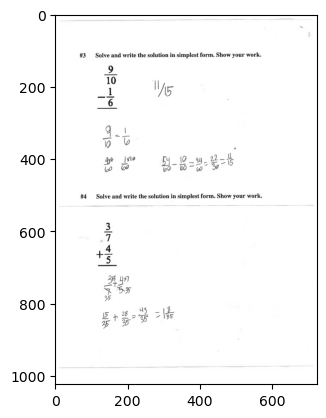

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLOv4
net = cv2.dnn.readNet("model/yolov4.weights", "model/yolov4.cfg")  # Update these to the correct paths
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load an image
img = cv2.imread("2.jpg")  # Update to your image path
height, width, channels = img.shape

# Detect objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(class_ids[i])
        color = (0, 255, 0)
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 2, color, 3)

# Show the image using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
